<a href="https://colab.research.google.com/github/RuwaAbey/PyTorch-Learning/blob/main/2D_heat_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Generate Heatmaps for a Single Frame**

Simulate a set of joints for an image and create heatmaps using Gaussian distribution


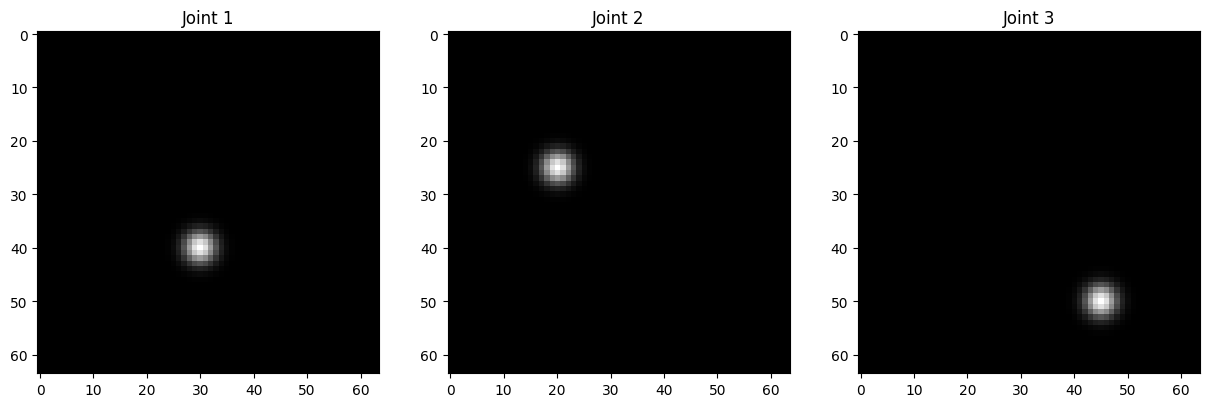

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_heatmap(joint, img_size=(64, 64), sigma=2):
    """
    Generate a single joint heatmap.
    Args:
        joint: Tuple (x, y, confidence) for the joint position.
        img_size: Size of the output image (height, width).
        sigma: Standard deviation of the Gaussian.
    Returns:
        Heatmap: A 2D numpy array.
    """
    H, W = img_size
    x, y, confidence = joint
    heatmap = np.zeros((H, W))

    for i in range(H):
        for j in range(W):
            heatmap[i, j] = confidence * np.exp(-((i - y) ** 2 + (j - x) ** 2) / (2 * sigma ** 2))

    return heatmap

# Simulate joint data (x, y, confidence)
joints = [(30, 40, 1), (20, 25, 0.9), (45, 50, 0.8)]  # Example joints
img_size = (64, 64)

# Generate and visualize heatmaps for each joint
heatmaps = [generate_heatmap(joint, img_size) for joint in joints]

# Plot each heatmap
fig, axs = plt.subplots(1, len(heatmaps), figsize=(15, 5))

for idx, heatmap in enumerate(heatmaps):
    axs[idx].imshow(heatmap, cmap='gray', interpolation='nearest')
    axs[idx].set_title(f"Joint {idx+1}")
plt.show()


**2.Stack Heatmaps to Create a 3D Heatmap Volume**

For action recognition, heatmaps from multiple joints across multiple frames are stacked along the temporal(time) dimension.

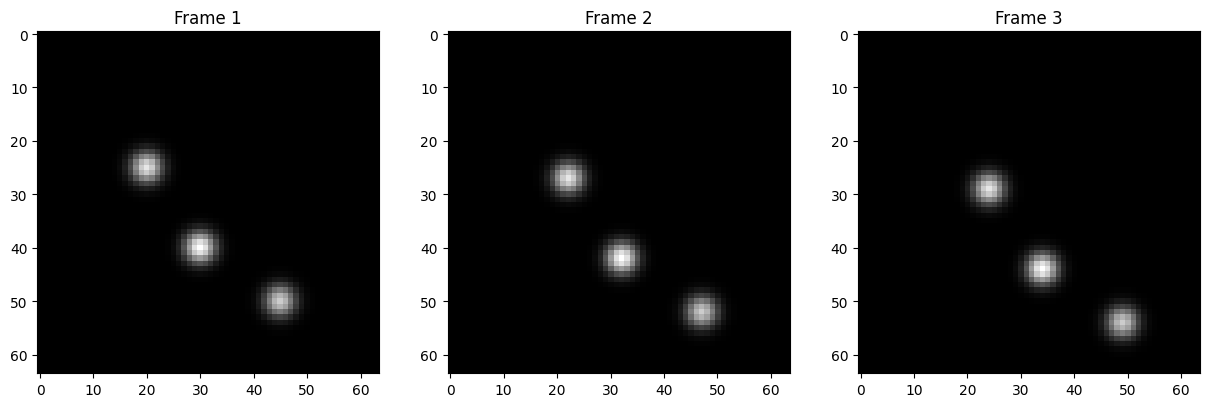

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def stack_heatmaps_across_frames(joint_data, img_size=(64, 64), sigma=2):
    """
    Create a 3D heatmap volume by stacking heatmaps across frames.
    Args:
        joint_data: List of lists of joints for each frame.
                    Each frame contains a list of (x, y, confidence) for each joint.
        img_size: Size of each heatmap (height, width).
        sigma: Standard deviation of the Gaussian.
    Returns:
        Heatmap volume: A 3D numpy array (num_frames, num_joints, H, W).
    """
    num_frames = len(joint_data)
    num_joints = len(joint_data[0])  # Assume same number of joints in all frames
    H, W = img_size

    heatmap_volume = np.zeros((num_frames, num_joints, H, W))

    for t, frame_joints in enumerate(joint_data):
        for j, joint in enumerate(frame_joints):
            heatmap_volume[t, j] = generate_heatmap(joint, img_size, sigma)

    return heatmap_volume

def generate_heatmap(joint, img_size=(64, 64), sigma=2):
    """
    Generate a single joint heatmap.
    Args:
        joint: Tuple (x, y, confidence) for the joint position.
        img_size: Size of the output image (height, width).
        sigma: Standard deviation of the Gaussian.
    Returns:
        Heatmap: A 2D numpy array.
    """
    H, W = img_size
    x, y, confidence = joint
    heatmap = np.zeros((H, W))

    for i in range(H):
        for j in range(W):
            heatmap[i, j] = confidence * np.exp(-((i - y) ** 2 + (j - x) ** 2) / (2 * sigma ** 2))

    return heatmap

# Simulate joint data across 3 frames
joint_data = [
    [(30, 40, 1), (20, 25, 0.9), (45, 50, 0.8)],  # Frame 1
    [(32, 42, 1), (22, 27, 0.9), (47, 52, 0.8)],  # Frame 2
    [(34, 44, 1), (24, 29, 0.9), (49, 54, 0.8)],  # Frame 3
]

# Generate 3D heatmap volume
heatmap_volume = stack_heatmaps_across_frames(joint_data)

# Combine heatmaps across joints by summing them for each frame
combined_heatmaps = np.sum(heatmap_volume, axis=1)

# Visualize the combined heatmap for each frame
fig, axs = plt.subplots(1, len(joint_data), figsize=(15, 5))
for idx, heatmap in enumerate(combined_heatmaps):
    axs[idx].imshow(heatmap, cmap='gray', interpolation='nearest')
    axs[idx].set_title(f"Frame {idx+1}")
plt.show()


**3. Use Heatmap Volumes in 3D-CNNs**

In [28]:
import torch

# Convert heatmap volume to PyTorch tensor for deep learning models
heatmap_volume_tensor = torch.tensor(heatmap_volume, dtype=torch.float32)
print("Heatmap volume shape:", heatmap_volume_tensor.shape)

# Example input to a 3D-CNN
# Model expects input of shape (batch_size, channels, depth, height, width)
input_tensor = heatmap_volume_tensor.unsqueeze(0)  # Add batch dimension
print("Input tensor shape for 3D-CNN:", input_tensor.shape)


Heatmap volume shape: torch.Size([3, 3, 64, 64])
Input tensor shape for 3D-CNN: torch.Size([1, 3, 3, 64, 64])
